In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Competition Description

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

Practice Skills
Computer vision fundamentals including simple neural networks

Classification methods such as SVM and K-nearest neighbors

# Evaluation

## Goal

The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, you should predict the correct label.

## Metric
This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).



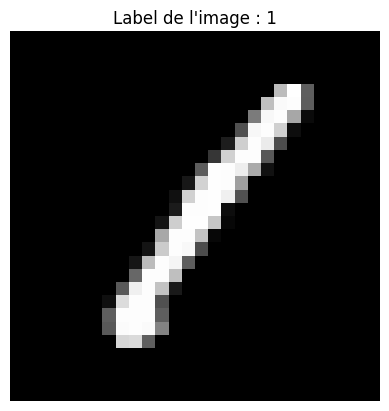

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données du fichier train.csv
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# Extraire la première image (toutes les colonnes sauf la première, qui est le label)
first_image_pixels = train_data.iloc[0, 1:].values

# Reshaper les données de 1D (784) à 2D (28x28)
first_image_pixels = first_image_pixels.reshape(28, 28)

# Afficher l'image
plt.imshow(first_image_pixels, cmap='gray')
plt.title(f"Label de l'image : {train_data.iloc[0, 0]}")
plt.axis('off')  # Désactiver les axes pour une meilleure visualisation
plt.show()


In [11]:
# Obtenir le nombre de lignes et de colonnes dans le dataset
nombre_lignes, nombre_colonnes = train_data.shape
print(f"Nombre de lignes : {nombre_lignes}")
print(f"Nombre de colonnes : {nombre_colonnes}")


Nombre de lignes : 42000
Nombre de colonnes : 785


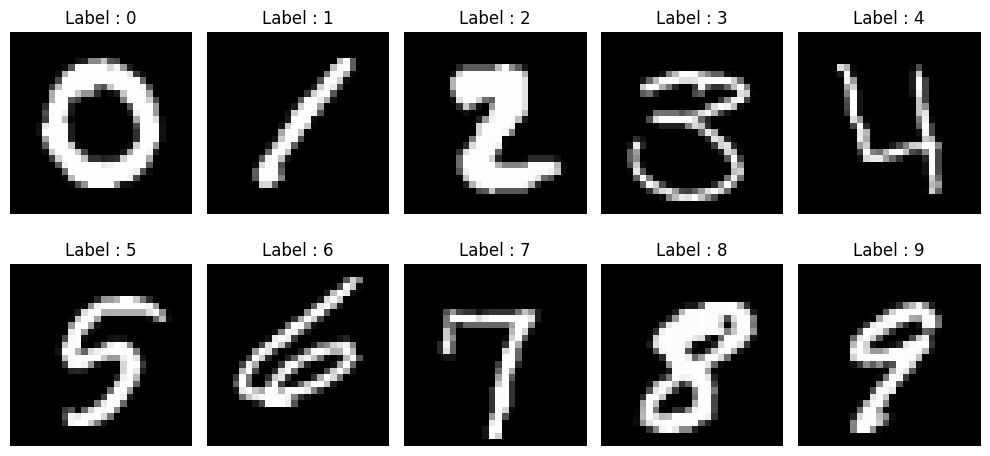

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données du fichier train.csv
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# Trouver une image pour chaque label (de 0 à 9)
labels = range(10)  # Les labels vont de 0 à 9
images_par_label = []

# Parcourir les labels et sélectionner une image correspondant à chaque label
for label in labels:
    # Trouver la première ligne correspondant à ce label
    image_row = train_data[train_data['label'] == label].iloc[0, 1:].values
    images_par_label.append(image_row.reshape(28, 28))  # Reshaper en 28x28

# Afficher les 10 images (une pour chaque label)
plt.figure(figsize=(10, 5))
for i, image in enumerate(images_par_label):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label : {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Séparer les données (train_test_split) pour l'évaluation
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:, 1:], train_data['label'], test_size=0.2, random_state=42)

# Normaliser les pixels entre 0 et 1
X_train = X_train / 255.0
X_val = X_val / 255.0

# Modèle KNN avec k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy du modèle KNN : {accuracy * 100:.2f}%")


Accuracy du modèle KNN : 96.67%


In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Charger le fichier test.csv
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Normaliser les pixels entre 0 et 1 (comme nous l'avons fait pour les données d'entraînement)
X_test = test_data / 255.0

# Charger le modèle KNN que tu as déjà entraîné (ou en entraîner un à nouveau)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prédire les labels pour les données de test
y_test_pred = knn.predict(X_test)

# Créer le fichier de soumission
submission = pd.DataFrame({
    'ImageId': range(1, len(y_test_pred) + 1),
    'Label': y_test_pred
})

# Sauvegarder dans un fichier CSV
submission.to_csv('submission_knn.csv', index=False)

print("Le fichier de soumission a été créé avec succès !")


Le fichier de soumission a été créé avec succès !


In [17]:
from sklearn.model_selection import GridSearchCV

# Paramètres à tester
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Grid Search pour trouver les meilleurs paramètres
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure accuracy : {grid_search.best_score_}")


Meilleurs paramètres : {'n_neighbors': 3, 'weights': 'distance'}
Meilleure accuracy : 0.9653869047619047


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Entraîner un modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédire sur le jeu de test
y_test_pred_rf = rf_model.predict(X_test)

# Sauvegarder la soumission
submission_rf = pd.DataFrame({'ImageId': range(1, len(y_test_pred_rf) + 1), 'Label': y_test_pred_rf})
submission_rf.to_csv('submission_rf.csv', index=False)


In [19]:
from sklearn.svm import SVC

# Entraîner un modèle SVM
svm_model = SVC(kernel='rbf', C=10, gamma=0.03)
svm_model.fit(X_train, y_train)

# Prédire sur le jeu de test
y_test_pred_svm = svm_model.predict(X_test)

# Sauvegarder la soumission
submission_svm = pd.DataFrame({'ImageId': range(1, len(y_test_pred_svm) + 1), 'Label': y_test_pred_svm})
submission_svm.to_csv('submission_svm.csv', index=False)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Séparation des données d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:, 1:], train_data['label'], test_size=0.2, random_state=42)

# Reshaper les données pour CNN (ajouter une dimension pour les canaux d'image)
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
X_val_reshaped = X_val.values.reshape(-1, 28, 28, 1)

# Construire un modèle CNN simple
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Évaluation sur les données de validation
val_loss, val_accuracy = cnn_model.evaluate(X_val_reshaped, y_val)
print(f"Précision du modèle CNN sur l'ensemble de validation : {val_accuracy * 100:.2f}%")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8788 - loss: 0.3909 - val_accuracy: 0.9798 - val_loss: 0.0658
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9814 - loss: 0.0581 - val_accuracy: 0.9831 - val_loss: 0.0546
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9893 - loss: 0.0359 - val_accuracy: 0.9874 - val_loss: 0.0407
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9912 - loss: 0.0267 - val_accuracy: 0.9894 - val_loss: 0.0353
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9941 - loss: 0.0190 - val_accuracy: 0.9892 - val_loss: 0.0328
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.9895 - val_loss: 0.0351
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9959 - loss: 0.0128 - val_accuracy: 0.9792 - val_loss: 0.0765
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9958 -

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


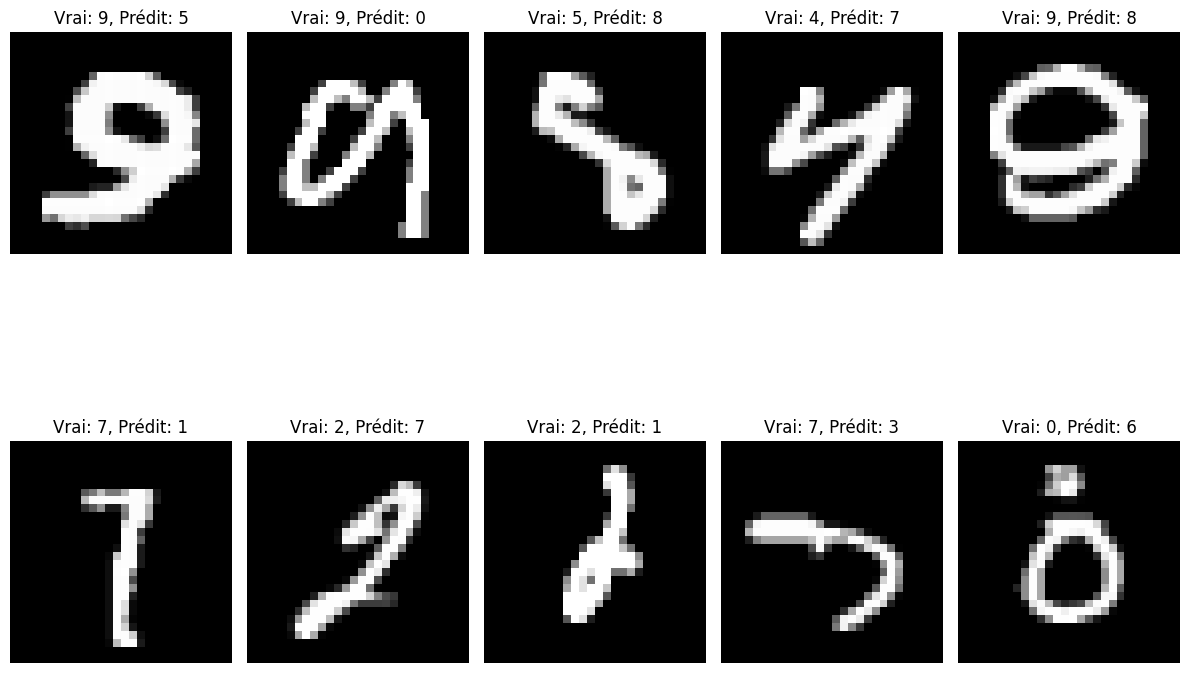

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Prédire sur l'ensemble de validation avec le modèle CNN
y_val_pred = model.predict(X_val.values.reshape(-1, 28, 28, 1))
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Comparer avec les labels réels
errors = np.where(y_val_pred_classes != y_val)[0]

# Afficher quelques exemples où le modèle s'est trompé
def afficher_erreurs(erreurs, nombre_images=10):
    plt.figure(figsize=(12, 10))
    
    for i, idx in enumerate(erreurs[:nombre_images]):
        # Extraire l'image originale et la prédiction incorrecte
        image = X_val.values[idx].reshape(28, 28)
        vrai_label = y_val.iloc[idx]
        pred_label = y_val_pred_classes[idx]

        # Afficher l'image avec le vrai label et la prédiction
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Vrai: {vrai_label}, Prédit: {pred_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Afficher les 10 premières erreurs
afficher_erreurs(errors, nombre_images=10)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Modèle CNN simple
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),  # Ajouter une couche convolutive
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train.values.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=32, validation_data=(X_val.values.reshape(-1, 28, 28, 1), y_val))

# Prédiction sur le jeu de test
y_test_pred_cnn = model.predict(X_test.values.reshape(-1, 28, 28, 1))
y_test_pred_cnn = np.argmax(y_test_pred_cnn, axis=1)

# Sauvegarder la soumission
submission_cnn = pd.DataFrame({'ImageId': range(1, len(y_test_pred_cnn) + 1), 'Label': y_test_pred_cnn})
submission_cnn.to_csv('submission_cnn.csv', index=False)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8243 - loss: 0.5425 - val_accuracy: 0.9704 - val_loss: 0.1002
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9732 - loss: 0.0841 - val_accuracy: 0.9738 - val_loss: 0.0890
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9818 - loss: 0.0588 - val_accuracy: 0.9835 - val_loss: 0.0574
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9847 - loss: 0.0481 - val_accuracy: 0.9807 - val_loss: 0.0652
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9884 - loss: 0.0348 - val_accuracy: 0.9827 - val_loss: 0.0581
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9908 - loss: 0.0258 - val_accuracy: 0.9836 - val_loss: 0.0570
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9934 - loss: 0.0178 - val_accuracy: 0.9825 - val_loss: 0.0637
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9942 -

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Séparation des données d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:, 1:], train_data['label'], test_size=0.2, random_state=42)

# Reshaper les données pour CNN (ajouter une dimension pour les canaux d'image)
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
X_val_reshaped = X_val.values.reshape(-1, 28, 28, 1)

# Construire un modèle CNN simple
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle avec plus d'epochs
model.fit(X_train.values.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=64, validation_data=(X_val.values.reshape(-1, 28, 28, 1), y_val))

# Évaluation sur les données de validation
val_loss, val_accuracy = cnn_model.evaluate(X_val_reshaped, y_val)
print(f"Précision du modèle CNN sur l'ensemble de validation : {val_accuracy * 100:.2f}%")

Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.9789 - loss: 8.7987 - val_accuracy: 0.9831 - val_loss: 1.7769
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9945 - loss: 0.2856 - val_accuracy: 0.9832 - val_loss: 1.5433
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9973 - loss: 0.0881 - val_accuracy: 0.9837 - val_loss: 1.4776
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9977 - loss: 0.0814 - val_accuracy: 0.9837 - val_loss: 1.3535
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9968 - loss: 0.1115 - val_accuracy: 0.9831 - val_loss: 1.6060
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9961 - loss: 0.1582 - val_accuracy: 0.9823 - val_loss: 1.2608
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9966 - loss: 0.0848 - val_accuracy: 0.9781 - val_loss: 1.7863
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9947 - loss: 0.1776 - 

In [24]:
# Prédiction sur le dataset de test avec le modèle CNN
y_test_pred_cnn = model.predict(X_test.values.reshape(-1, 28, 28, 1))
y_test_pred_cnn = np.argmax(y_test_pred_cnn, axis=1)

# Créer le fichier de soumission
submission_cnn3 = pd.DataFrame({
    'ImageId': range(1, len(y_test_pred_cnn) + 1),
    'Label': y_test_pred_cnn
})

# Sauvegarder dans un fichier CSV
submission_cnn3.to_csv('submission_cnn3.csv', index=False)

print("Fichier de soumission 'submission_cnn3.csv' généré avec succès.")


875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
Fichier de soumission 'submission_cnn3.csv' généré avec succès.
